[*********************100%***********************]  1 of 1 completed


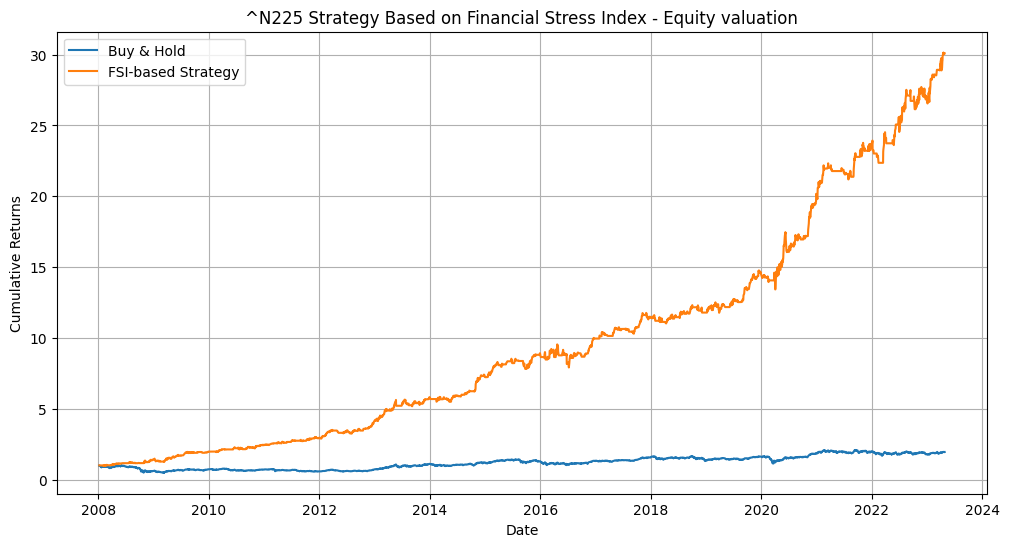

Performance Metrics for ^N225:
Annualized Returns:
0.045506
0.257513

Annualized Volatility:
0.238137
0.149778

Sharpe Ratios:
0.191091
1.719295

Maximum Drawdowns:
returns            -0.516754
strategy_returns   -0.170725
dtype: float64


[*********************100%***********************]  1 of 1 completed


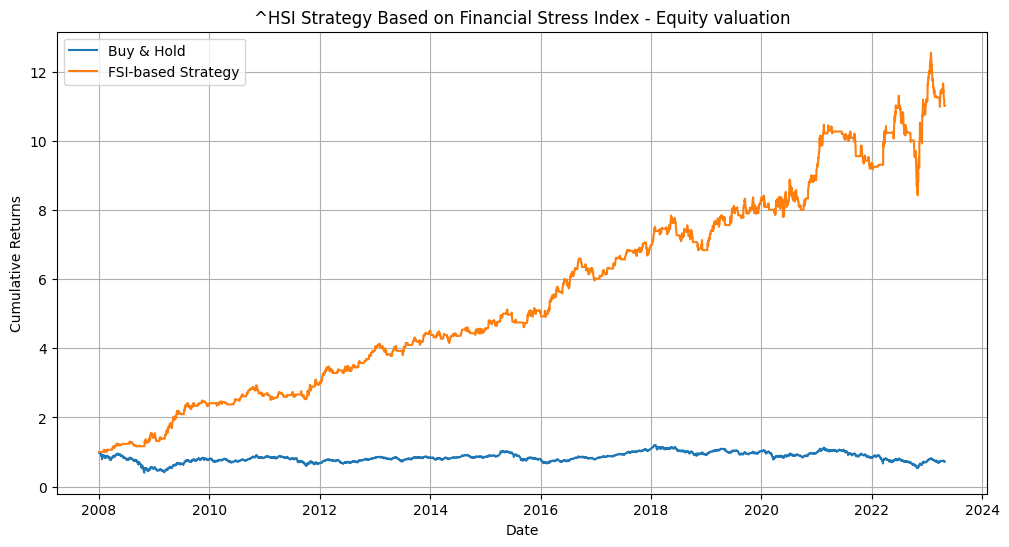

Performance Metrics for ^HSI:
Annualized Returns:
-0.021713
 0.173771

Annualized Volatility:
0.244656
0.161434

Sharpe Ratios:
-0.088748
 1.076419

Maximum Drawdowns:
returns            -0.601104
strategy_returns   -0.254826
dtype: float64


[*********************100%***********************]  1 of 1 completed


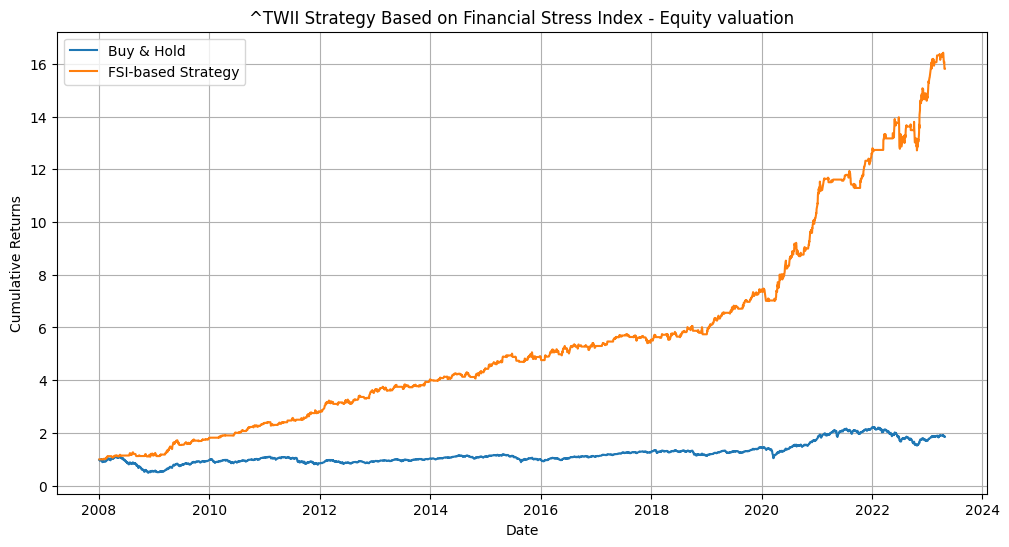

Performance Metrics for ^TWII:
Annualized Returns:
0.042281
0.203909

Annualized Volatility:
0.182633
0.118685

Sharpe Ratios:
0.231510
1.718072

Maximum Drawdowns:
returns            -0.559995
strategy_returns   -0.128500
dtype: float64


[*********************100%***********************]  1 of 1 completed


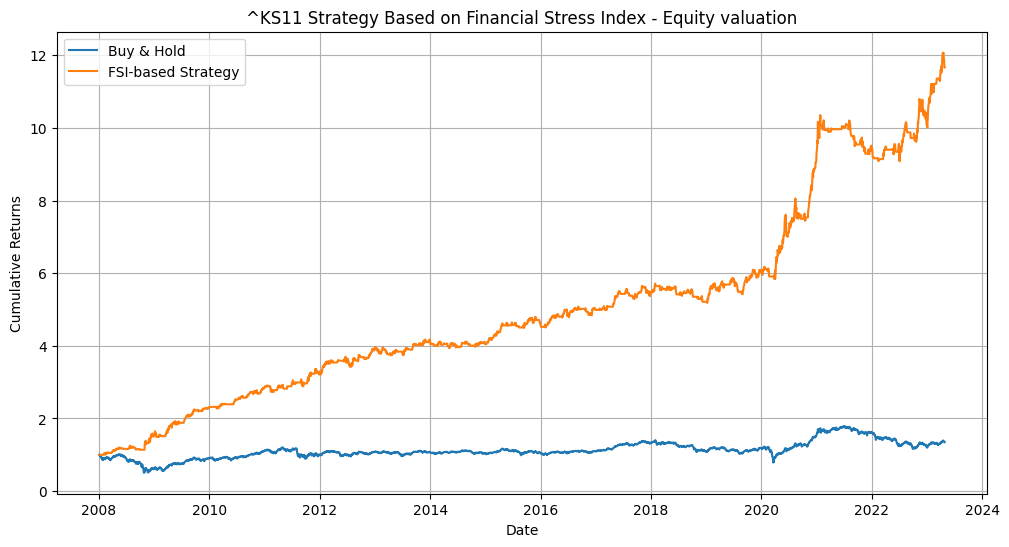

Performance Metrics for ^KS11:
Annualized Returns:
0.020014
0.177748

Annualized Volatility:
0.194980
0.123663

Sharpe Ratios:
0.102648
1.437355

Maximum Drawdowns:
returns            -0.503012
strategy_returns   -0.122709
dtype: float64


[*********************100%***********************]  1 of 1 completed


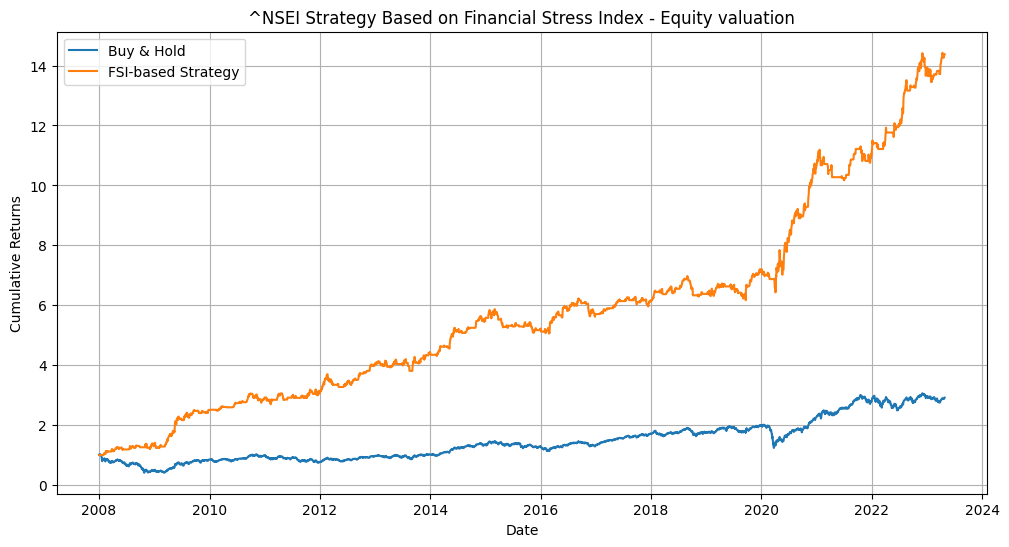

Performance Metrics for ^NSEI:
Annualized Returns:
0.074519
0.196083

Annualized Volatility:
0.216337
0.145635

Sharpe Ratios:
0.344458
1.346400

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.138417
dtype: float64


[*********************100%***********************]  1 of 1 completed


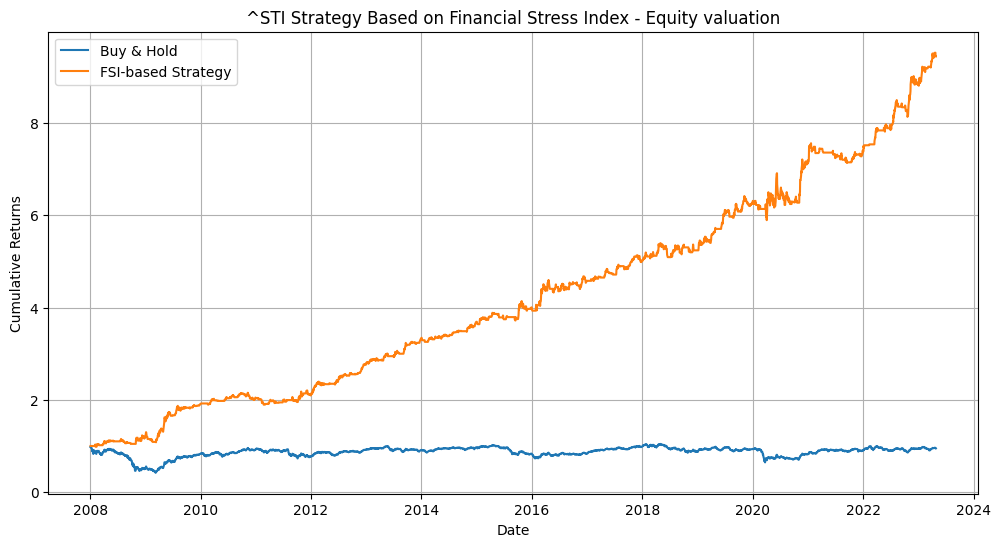

Performance Metrics for ^STI:
Annualized Returns:
-0.003498
 0.159486

Annualized Volatility:
0.168257
0.112596

Sharpe Ratios:
-0.020789
 1.416440

Maximum Drawdowns:
returns            -0.576196
strategy_returns   -0.169052
dtype: float64




In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import empyrical as ep

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define market indexes list
indexes = ['^N225','^HSI','^TWII','^KS11','^NSEI', '^STI']

# Define start and end dates
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Loop through each market index
for index in indexes:
    # Download data for the index from Yahoo Finance
    prices = yf.download(index, start="2008-01-01", end=end_date)['Close']

    # Calculate daily returns
    daily_returns = prices.pct_change()

    # Align datasets
    aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

    # Create a strategy DataFrame
    strategy_data = aligned_data.copy()

    # Calculate the 14-day SMA for the 'OFR FSI' column of the FSI and shift by 1 day to avoid look-ahead bias
    strategy_data['fsi_sma_14'] = strategy_data['Equity valuation'].rolling(window=14).mean().shift(1)

    # Generate the trading signal based on the SMA
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'] < strategy_data['fsi_sma_14'], 1, 0)

    # Calculate strategy returns using the signal from the previous day to avoid look-ahead bias
    strategy_data['strategy_returns'] = strategy_data['signal'].shift(1) * strategy_data['returns']

    # Calculate cumulative returns
    cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

    # Plot the strategy performance for the index
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns)
    plt.title(f'{index} Strategy Based on Financial Stress Index - Equity valuation')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(['Buy & Hold', 'FSI-based Strategy'])
    plt.grid()
    plt.show()

    # Compute performance metrics
    trading_days_per_year = 252
    annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
    annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
    sharpe_ratios = annualized_returns / annualized_volatility

    # Calculate maximum drawdown
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    max_drawdowns = drawdowns.min()

    # Print performance metrics for the index
    print(f"Performance Metrics for {index}:")
    print("Annualized Returns:")
    print(annualized_returns.to_string(index=False))
    print("\nAnnualized Volatility:")
    print(annualized_volatility.to_string(index=False))
    print("\nSharpe Ratios:")
    print(sharpe_ratios.to_string(index=False))
    print("\nMaximum Drawdowns:")
    print(max_drawdowns)
    print("\n" + "="*50 + "\n")


[*********************100%***********************]  1 of 1 completed


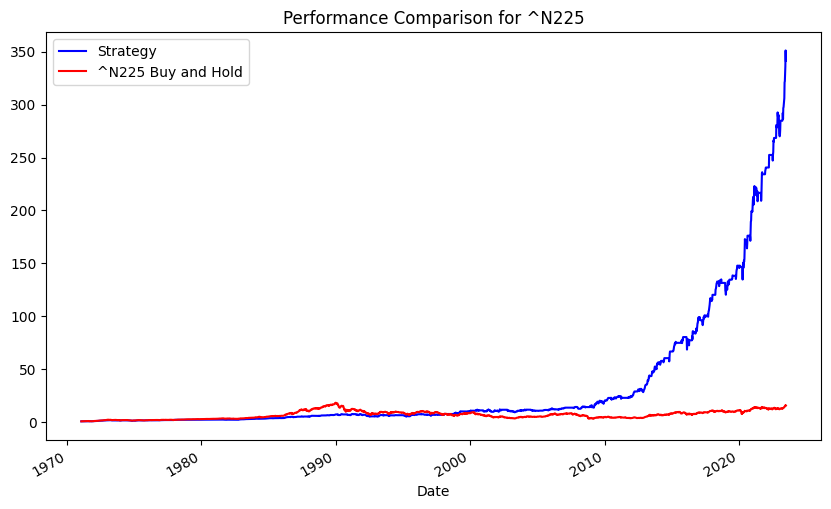

For ^N225:
Strategy: CAGR: 11.76%, Max Drawdown: -31.53%, Sharpe Ratio: 0.90
^N225 Buy and Hold: CAGR: 5.41%, Max Drawdown: -81.57%, Sharpe Ratio: 0.37
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


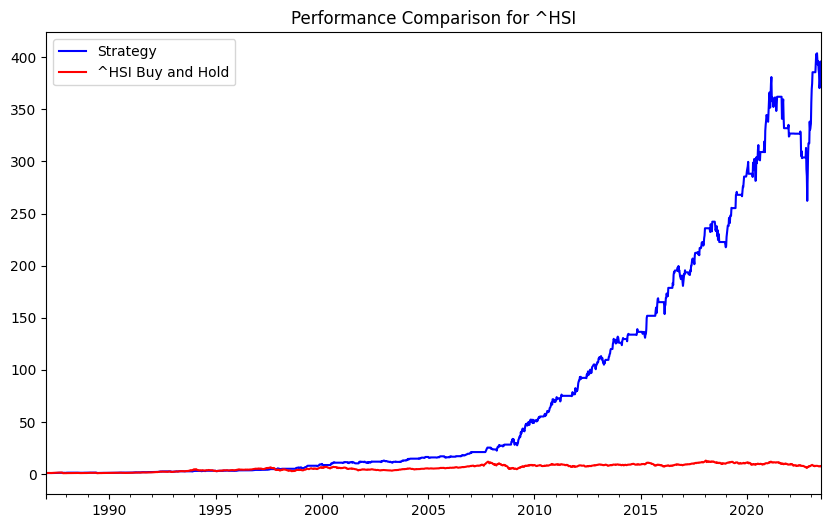

For ^HSI:
Strategy: CAGR: 17.63%, Max Drawdown: -32.31%, Sharpe Ratio: 1.06
^HSI Buy and Hold: CAGR: 5.64%, Max Drawdown: -60.87%, Sharpe Ratio: 0.35
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


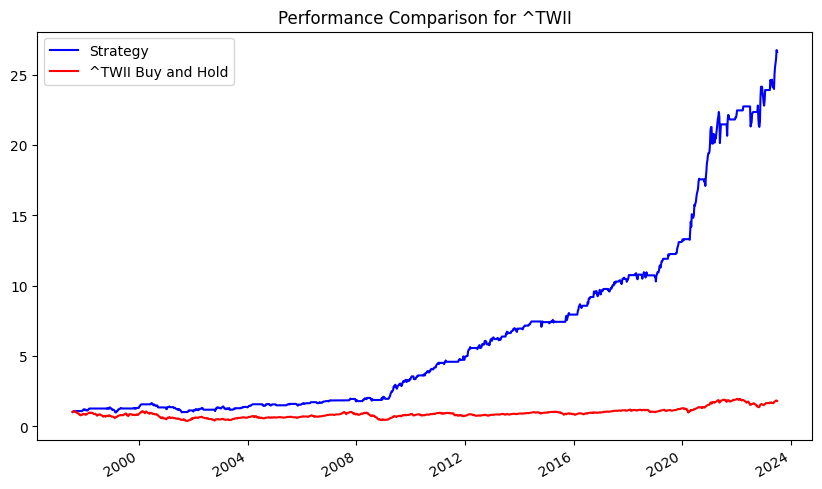

For ^TWII:
Strategy: CAGR: 13.47%, Max Drawdown: -39.92%, Sharpe Ratio: 0.98
^TWII Buy and Hold: CAGR: 2.30%, Max Drawdown: -64.60%, Sharpe Ratio: 0.21
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


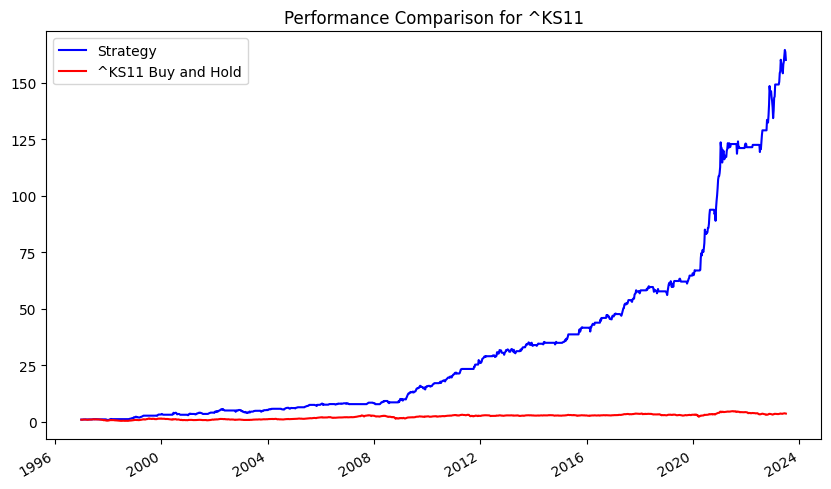

For ^KS11:
Strategy: CAGR: 21.09%, Max Drawdown: -37.49%, Sharpe Ratio: 1.14
^KS11 Buy and Hold: CAGR: 4.99%, Max Drawdown: -62.17%, Sharpe Ratio: 0.32
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


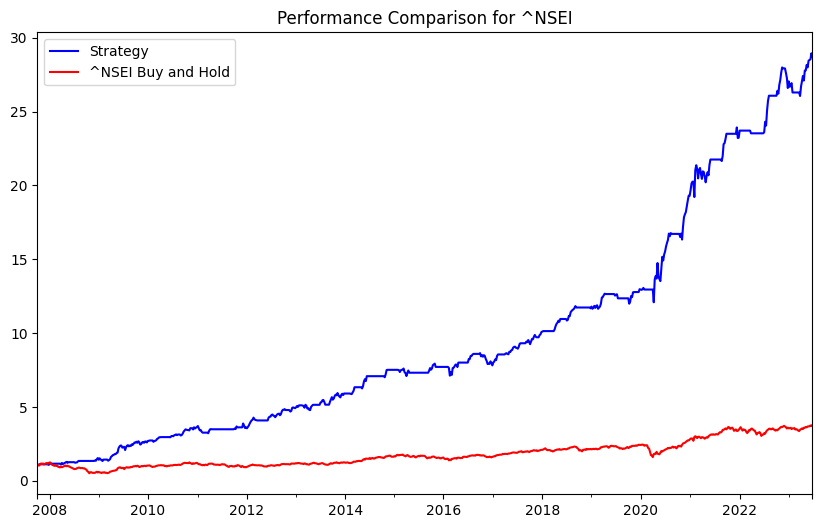

For ^NSEI:
Strategy: CAGR: 23.76%, Max Drawdown: -13.20%, Sharpe Ratio: 1.51
^NSEI Buy and Hold: CAGR: 8.81%, Max Drawdown: -58.82%, Sharpe Ratio: 0.51
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


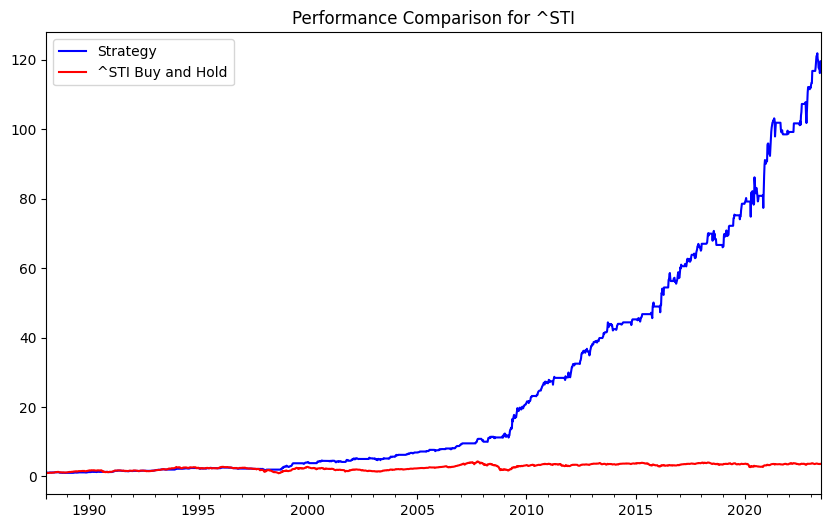

For ^STI:
Strategy: CAGR: 14.37%, Max Drawdown: -42.16%, Sharpe Ratio: 1.06
^STI Buy and Hold: CAGR: 3.66%, Max Drawdown: -67.38%, Sharpe Ratio: 0.28
--------------------------------------------------


In [13]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()  # Corrected window size

tickers = ['^N225','^HSI','^TWII','^KS11','^NSEI', '^STI']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start=nfci_data.index.min(), end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] < data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)
